In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation


In [2]:
df = pd.read_csv("../datasets/ProcessedData.csv")
df

,Unnamed: 0.1,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'AirName', 'Comments', 'DateFlown',
       'Review', 'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'Recommended', 'ReviewDate', 'ReviewTitle',
       'ReviewrCountry', 'SeatComfortRating', 'SeatType', 'ServiceRating',
       'ValueRating', 'WifiRating'],
      dtype='object')

In [4]:
df.drop(columns=["Unnamed: 0.1"],inplace=True)

In [5]:
df

,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [6]:
df.groupby("AirName").describe()

Unnamed: 0                                \
                                         count     mean         std      min   
AirName                                                                        
Air India                                390.0   1213.5  112.727548   1019.0   
Ana                                      390.0   2418.5  112.727548   2224.0   
air-europa                               390.0    433.5  112.727548    239.0   
air-france                               390.0    823.5  112.727548    629.0   
air-new-zealand                          390.0   1634.5  112.727548   1440.0   
airasia                                  239.0    119.0   69.137544      0.0   
american-airlines                        390.0   2028.5  112.727548   1834.0   
austrian-airlines                        390.0   2817.5  112.727548   2623.0   
bangkok-airways                          390.0   3229.5  112.727548   3035.0   
british-airways                          390.0   3624.5  112.727548   3430.0   
emirates                                 390.0   4014.5  112.727548   3820.0   
ethiopian-airlines                       390.0   4404.5  112.727548   4210.0   
flydubai                                 336.0   4767.5   97.139076   4600.0   
frontier-airlines                        390.0   5130.5  112.727548   4936.0   
gulf-air                                 350.0   5500.5  101.180532   5326.0   
hawaiian-airlines                        390.0   5870.5  112.727548   5676.0   
indigo-airlines                          389.0   6260.0  112.438872   6066.0   
japan-airlines                           382.0   6645.5  110.418145   6455.0   
jet2-com                                 385.0   7029.0  111.284171   6837.0   
kenya-airways                            387.0   7415.0  111.861522   7222.0   
korean-air                               390.0   7803.5  112.727548   7609.0   
lufthansa                                390.0   8193.5  112.727548   7999.0   
malaysia-airlines                        390.0   8583.5  112.727548   8389.0   
monarch-airlines                         318.0   8937.5   91.942917   8779.0   
oman-air                                 390.0   9407.5  112.727548   9213.0   
pegasus-airlines                         368.0   9786.5  106.376689   9603.0   
philippine-airlines                      390.0  10165.5  112.727548   9971.0   
pia-pakistan-international-airlines      146.0  10433.5   42.290661  10361.0   
porter-airlines                          301.0  10657.0   87.035433  10507.0   
qantas-airways                           390.0  11002.5  112.727548  10808.0   
qatar-airways                            390.0  11392.5  112.727548  11198.0   
royal-air-maroc                          310.0  11742.5   89.633513  11588.0   
royal-brunei-airlines                    349.0  12072.0  100.891856  11898.0   
royal-jordanian-airlines                 350.0  12421.5  101.180532  12247.0   
ryanair                                  390.0  12791.5  112.727548  12597.0   
sas-scandinavian-airlines                390.0  13181.5  112.727548  12987.0   
saudi-arabian-airlines                   359.0  13556.0  103.778611  13377.0   
scoot                                    390.0  13930.5  112.727548  13736.0   
singapore-airlines                       390.0  14320.5  112.727548  14126.0   
south-african-airways                    390.0  14710.5  112.727548  14516.0   
southwest-airlines                       390.0  15100.5  112.727548  14906.0   
spicejet                                 390.0  15490.5  112.727548  15296.0   
spirit-airlines                          390.0  15880.5  112.727548  15686.0   
srilankan-airlines                       127.0  16139.0   36.805797  16076.0   
sun-country-airlines                     297.0  16351.0   85.880731  16203.0   
sunwing-airlines                         384.0  16691.5  110.995495  16500.0   
swiss-international-air-lines            390.0  17078.5  112.727548  16884.0   
swoop                               

In [7]:
top_airlines = df.groupby("AirName")['OverallScore'].mean().nlargest(10)

In [8]:
top_airlines

AirName
Ana                      7.958974
bangkok-airways          7.512821
japan-airlines           7.374346
qatar-airways            7.361538
korean-air               7.289744
royal-brunei-airlines    7.240688
jet2-com                 6.646753
indigo-airlines          6.326478
monarch-airlines         6.094340
singapore-airlines       6.010256
Name: OverallScore, dtype: float64

In [9]:
top_airlines.index 

Index(['Ana', 'bangkok-airways', 'japan-airlines', 'qatar-airways',
       'korean-air', 'royal-brunei-airlines', 'jet2-com', 'indigo-airlines',
       'monarch-airlines', 'singapore-airlines'],
      dtype='object', name='AirName')

In [10]:
top_airlines.values

array([7.95897436, 7.51282051, 7.37434555, 7.36153846, 7.28974359,
       7.24068768, 6.64675325, 6.32647815, 6.09433962, 6.01025641])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ana'),
  Text(1, 0, 'bangkok-airways'),
  Text(2, 0, 'japan-airlines'),
  Text(3, 0, 'qatar-airways'),
  Text(4, 0, 'korean-air'),
  Text(5, 0, 'royal-brunei-airlines'),
  Text(6, 0, 'jet2-com'),
  Text(7, 0, 'indigo-airlines'),
  Text(8, 0, 'monarch-airlines'),
  Text(9, 0, 'singapore-airlines')])

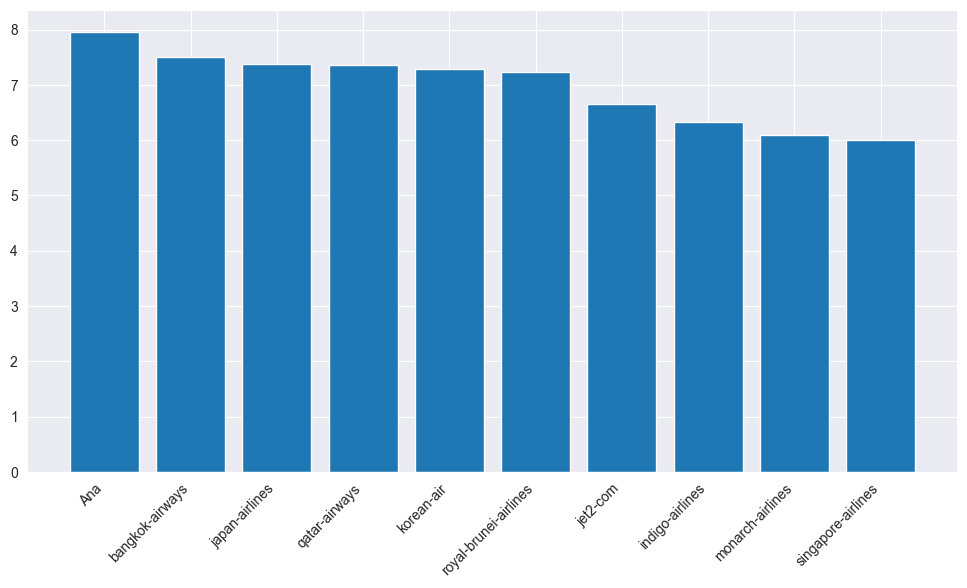

In [11]:
plt.figure(figsize=(12,6))
plt.bar(top_airlines.index,top_airlines.values)
plt.xticks(rotation=45,ha='right')

In [12]:
x = df['AirName'].unique()
x

array(['airasia', 'air-europa', 'air-france', 'Air India',
       'air-new-zealand', 'american-airlines', 'Ana', 'austrian-airlines',
       'bangkok-airways', 'british-airways', 'emirates',
       'ethiopian-airlines', 'flydubai', 'frontier-airlines', 'gulf-air',
       'hawaiian-airlines', 'indigo-airlines', 'japan-airlines',
       'jet2-com', 'kenya-airways', 'korean-air', 'lufthansa',
       'malaysia-airlines', 'monarch-airlines', 'oman-air',
       'pegasus-airlines', 'philippine-airlines',
       'pia-pakistan-international-airlines', 'porter-airlines',
       'qantas-airways', 'qatar-airways', 'royal-air-maroc',
       'royal-brunei-airlines', 'royal-jordanian-airlines', 'ryanair',
       'sas-scandinavian-airlines', 'saudi-arabian-airlines', 'scoot',
       'singapore-airlines', 'south-african-airways',
       'southwest-airlines', 'spicejet', 'spirit-airlines',
       'srilankan-airlines', 'sun-country-airlines', 'sunwing-airlines',
       'swiss-international-air-lines', 's

In [13]:
df.groupby("OverallScore").describe()

Unnamed: 0                                                      \
                  count          mean          std    min      25%      50%   
OverallScore                                                                  
1                6813.0  10121.102892  5959.938836    0.0  4730.00  10837.0   
2                1807.0   9607.592695  5568.221212    3.0  4674.50   9838.0   
3                1225.0   9471.813061  5356.847324   18.0  4788.00   9540.0   
4                 695.0   9182.194245  5047.215530  139.0  4686.50   9039.0   
5                 811.0   8899.759556  4974.380749    5.0  4556.50   8639.0   
6                 689.0   9024.869376  4812.691305  143.0  5437.00   9005.0   
7                1010.0   8692.501980  4975.892751  108.0  4519.00   8718.5   
8                1554.0   8900.955598  4852.920223   20.0  5433.75   8657.5   
9                1762.0   8746.799659  4821.889397    1.0  4705.50   8469.0   
10               2268.0   8873.545414  4988.225761   85.0  4408.00   8563.0   

                                DateFlown              ... ValueRating       \
                   75%      max     count        mean  ...         75%  max   
OverallScore                                           ...                    
1             15768.00  18820.0    6813.0  692.772934  ...         1.0  5.0   
2             14450.00  18808.0    1807.0  687.553403  ...         2.0  5.0   
3             13974.00  18811.0    1225.0  681.249796  ...         3.0  5.0   
4             13452.00  18772.0     695.0  701.667626  ...         3.0  5.0   
5             12876.00  18685.0     811.0  660.601726  ...         4.0  5.0   
6             13194.00  18689.0     689.0  703.635704  ...         4.0  5.0   
7             12565.50  18810.0    1010.0  651.642574  ...         4.0  5.0   
8             12549.25  18708.0    1554.0  669.391248  ...         5.0  5.0   
9             12220.25  18791.0    1762.0  663.083995  ...         5.0  5.0   
10            12509.50  18818.0    2268.0  676.464286  ...         5.0  5.0   

             WifiRating                                               
                  count      mean       std  min  25%  50%  75%  max  
OverallScore                                                          
1                6813.0  0.440041  0.747157  0.0  0.0  0.0  1.0  5.0  
2                1807.0  0.484781  0.892733  0.0  0.0  0.0  1.0  5.0  
3                1225.0  0.536327  1.007583  0.0  0.0  0.0  1.0  5.0  
4                 695.0  0.513669  1.005475  0.0  0.0  0.0  1.0  5.0  
5                 811.0  0.450062  1.087940  0.0  0.0  0.0  0.0  5.0  
6                 689.0  0.523948  1.218710  0.0  0.0  0.0  0.0  5.0  
7                1010.0  0.443564  1.157251  0.0  0.0  0.0  0.0  5.0  
8                1554.0  0.474260  1.264573  0.0  0.0  0.0  0.0  5.0  
9                1762.0  0.637911  1.477253  0.0  0.0  0.0  0.0  5.0  
10               2268.0  1.085538  1.962080  0.0  0.0  0.0  1.0  5.0  

[10 rows x 88 columns]

In [14]:
df.groupby("AirName")['OverallScore'].mean()

AirName
Air India                              3.100000
Ana                                    7.958974
air-europa                             3.671795
air-france                             4.202564
air-new-zealand                        4.841026
airasia                                3.012552
american-airlines                      2.082051
austrian-airlines                      4.494872
bangkok-airways                        7.512821
british-airways                        4.194872
emirates                               4.051282
ethiopian-airlines                     4.458974
flydubai                               3.571429
frontier-airlines                      1.446154
gulf-air                               5.400000
hawaiian-airlines                      4.771795
indigo-airlines                        6.326478
japan-airlines                         7.374346
jet2-com                               6.646753
kenya-airways                          4.635659
korean-air                      

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [16]:
x = vec.fit_transform(df['Review'])

In [17]:
x.shape

(18634, 15622)

In [18]:
vec.get_feature_names_out()

array(['aa', 'aaadvantage', 'aadvantage', ..., 'zurich', 'zvartnots',
       'zya'], dtype=object)

In [19]:
feature_names = vec.get_feature_names_out() 

In [20]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(x)

LatentDirichletAllocation(random_state=42)

In [21]:
lda.components_.shape

(10, 15622)

In [22]:
lda.components_[0]

array([12.45912962,  0.10015832,  0.1000665 , ...,  1.15607932,
        0.10021604,  0.1       ])

In [23]:
for i,j in enumerate(lda.components_):
    print(i," ",j)

0   [12.45912962  0.10015832  0.1000665  ...  1.15607932  0.10021604
  0.1       ]
1   [ 5.50232491  0.1         0.1        ... 49.16271833  0.1
  0.1       ]
2   [55.28758357  0.10004853  2.09980485 ... 50.1205463   1.09949599
  0.10001498]
3   [ 0.10001852  0.1         0.1        ... 12.52544063  0.1
  1.09988909]
4   [ 3.25530408  0.1         0.10012864 ... 38.83759221  0.1
  0.10009593]
5   [ 3.21565244  0.1         0.1        ... 97.4231164   0.1
  0.1       ]
6   [2.85009977e+00 1.00000000e-01 1.00000000e-01 ... 1.36446534e+02
 1.00287952e-01 1.00000000e-01]
7   [1.129855   0.10026663 0.1        ... 0.10002093 0.1        0.1       ]
8   [0.10001478 1.09952651 0.1        ... 0.10862949 0.1        0.1       ]
9   [0.1000173  0.1        0.1        ... 0.11932255 0.1        0.1       ]


In [24]:
lda.components_[:,:100]

array([[1.24591296e+01, 1.00158319e-01, 1.00066502e-01, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
        1.00015801e-01, 1.00005790e-01, 1.00000000e-01, 1.00009702e-01,
        1.99401838e+00, 1.00000000e-01, 1.00015233e-01, 1.00000000e-01,
        1.00000001e-01, 2.13575389e+01, 2.09996924e+00, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00009809e-01,
        1.00000000e-01, 1.00040038e-01, 1.00000000e-01, 5.99861939e+00,
        1.00006695e-01, 1.33093679e+02, 1.00000000e-01, 1.00114165e-01,
        4.93989582e+00, 1.00038635e-01, 1.00000000e-01, 1.00000001e-01,
        1.00000000e-01, 1.00000000e-01, 1.00034418e-01, 1.00000001e-01,
        1.00000000e-01, 4.62062062e+00, 3.75289047e+00, 1.00027441e-01,
        1.00109991e-01, 1.00011529e-01, 1.00002279e-01, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 3.45514844e+01, 1.09960590e+00,
        7.47058736e+01, 1.00163160e-01, 1.00022594e-01, 1.084432

In [25]:
feature_names = vec.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic #0:
flight ticket bag airline customer service refund luggage pay booked

Topic #1:
flight seat time booked air year delhi india asked wife

Topic #2:
flight hour delayed time airport delay airline day pm minute

Topic #3:
seat flight staff bangkok check airport extra leg crew room

Topic #4:
check boarding lounge airport johannesburg business class airway counter nairobi

Topic #5:
flight service air paris airline casablanca experience business doha customer

Topic #6:
flight seat food good service crew cabin class business time

Topic #7:
airline time fly service experience flight worst istanbul review flying

Topic #8:
flight time th flew airline return crew staff plane jet

Topic #9:
flight seat plane aircraft staff kuala lumpur boarding crew old


In [26]:
# Create a count vectorizer and fit it to the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'])


In [27]:
vectorizer.get_feature_names_out()

array(['aa', 'aaadvantage', 'aadvantage', ..., 'zurich', 'zvartnots',
       'zya'], dtype=object)

In [28]:
X.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Use KMeans clustering to group similar reviews together
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)


/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [30]:
# Get the top terms for each cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])
    print()


Cluster 0:
 class
 business
 economy
 flight
 seats
 service
 seat
 food
 good
 flew

Cluster 1:
 flight
 delayed
 hours
 time
 cancelled
 booked
 service
 hour
 return
 good

Cluster 2:
 flight
 service
 airline
 hours
 staff
 delayed
 check
 airlines
 good
 airport

Cluster 3:
 service
 airline
 check
 staff
 airlines
 flights
 flew
 good
 food
 experience

Cluster 4:
 time
 flight
 flights
 service
 check
 good
 airline
 staff
 airlines
 crew


In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'])

In [33]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [34]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [35]:
vectorizer.get_feature_names_out()

array(['aa', 'aaadvantage', 'aadvantage', ..., 'zurich', 'zvartnots',
       'zya'], dtype=object)

In [36]:
lda.components_.shape

(10, 13911)

In [37]:
# Print the top 10 words and sentiment polarity scores for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    sentiment_scores = []
    for word in top_words:
        scores = sia.polarity_scores(word)
        sentiment_scores.append(scores['compound'])
    print("Top words: ", top_words)
    print("Sentiment polarity scores: ", sentiment_scores)
    print("Average sentiment polarity score: ", np.mean(sentiment_scores))
    print()

Topic #0:
Top words:  ['airways', 'bangkok', 'airlines', 'time', 'flown', 'flights', 'flying', 'flight', 'airport', 'qatar']
Sentiment polarity scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average sentiment polarity score:  0.0

Topic #1:
Top words:  ['class', 'business', 'economy', 'seats', 'seat', 'new', 'airlines', 'flew', 'service', 'air']
Sentiment polarity scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average sentiment polarity score:  0.0

Topic #2:
Top words:  ['flight', 'cancelled', 'booked', 'delayed', 'hours', 'airline', 'worst', 'flights', 'trip', 'fly']
Sentiment polarity scores:  [0.0, -0.25, 0.0, -0.2263, 0.0, 0.0, -0.6249, 0.0, 0.0, 0.0]
Average sentiment polarity score:  -0.11012

Topic #3:
Top words:  ['service', 'customer', 'check', 'flight', 'airlines', 'addis', 'booking', 'online', 'ababa', 'ticket']
Sentiment polarity scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average sentiment polarity score:  0.0

Topic #4:
Top words

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [39]:
# Load the dataset
reviews_df = pd.read_csv("../datasets/ProcessedData.csv")

# Perform clustering using K-Means algorithm
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews_df['Review'])
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(tfidf)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [40]:
tfidf_vectorizer.get_feature_names_out()

array(['aa', 'aaadvantage', 'aadvantage', ..., 'zurich', 'zvartnots',
       'zya'], dtype=object)

In [41]:
tfidf.toarray().shape

(18634, 15622)

In [42]:
kmeans.cluster_centers_[0]

array([3.45330914e-04, 0.00000000e+00, 0.00000000e+00, ...,
       4.20944054e-03, 8.86027519e-05, 0.00000000e+00])

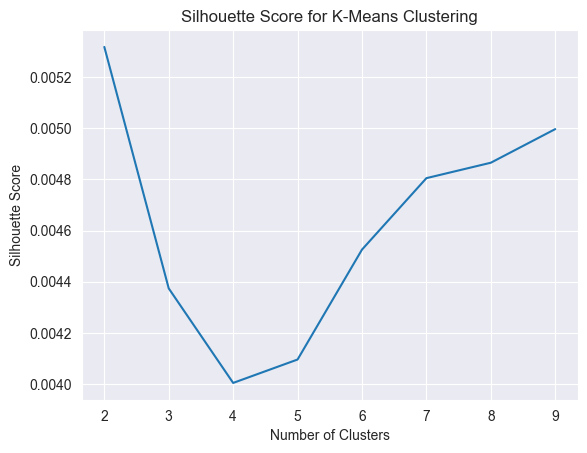

In [43]:
# Determine the optimal number of clusters
max_clusters = 10
silhouette_scores = []

for k in range(2, max_clusters):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(tfidf)
    silhouette_scores.append(silhouette_score(tfidf, kmeans.labels_))

plt.plot(range(2, max_clusters), silhouette_scores)
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [44]:
kmeans.labels_.shape

(18634,)

In [45]:
reviews_df

,Unnamed: 0.1,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [46]:
# Perform classification using Naive Bayes algorithm
X_train, X_test, y_train, y_test = train_test_split(reviews_df['Review'], reviews_df['AirName'], test_size=0.2, random_state=42)
count_vectorizer = CountVectorizer(stop_words='english')
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)
y_pred = nb_classifier.predict(X_test_counts)

# Evaluate the classification results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[49  1  0 ...  2  0  0]
 [ 0 70  0 ...  0  0  0]
 [ 1  0 56 ...  2  0  1]
 ...
 [ 0  1  0 ... 37  2  1]
 [ 0  0  0 ...  0 56  0]
 [ 0  2  0 ...  1  0 40]]
                                     precision    recall  f1-score   support

                          Air India       0.63      0.56      0.59        88
                                Ana       0.56      0.84      0.68        83
                         air-europa       0.80      0.73      0.76        77
                         air-france       0.68      0.64      0.66        67
                    air-new-zealand       0.76      0.68      0.72        73
                            airasia       0.72      0.28      0.41        46
                  american-airlines       0.33      0.47      0.39        74
                  austrian-airlines       0.88      0.68      0.76        77
                    bangkok-airways       0.76      0.94      0.84        78
                    british-airways       0.73      0.49      0.58       

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [47]:
reviews = pd.read_csv('../datasets/ProcessedData.csv')

# Group the reviews by airline
reviews_by_airline = reviews.groupby('AirName')
reviews_by_airline.describe()

Unnamed: 0.1                       \
                                           count     mean         std   
AirName                                                                 
Air India                                  390.0   1213.5  112.727548   
Ana                                        390.0   2383.5  112.727548   
air-europa                                 390.0    433.5  112.727548   
air-france                                 390.0    823.5  112.727548   
air-new-zealand                            390.0   1603.5  112.727548   
airasia                                    239.0    119.0   69.137544   
american-airlines                          390.0   1993.5  112.727548   
austrian-airlines                          390.0   2773.5  112.727548   
bangkok-airways                            390.0   3163.5  112.727548   
british-airways                            390.0   3553.5  112.727548   
emirates                                   390.0   3943.5  112.727548   
ethiopian-airlines                         390.0   4333.5  112.727548   
flydubai                                   336.0   4696.5   97.139076   
frontier-airlines                          390.0   5059.5  112.727548   
gulf-air                                   350.0   5429.5  101.180532   
hawaiian-airlines                          390.0   5799.5  112.727548   
indigo-airlines                            389.0   6189.0  112.438872   
japan-airlines                             382.0   6574.5  110.418145   
jet2-com                                   385.0   6958.0  111.284171   
kenya-airways                              387.0   7344.0  111.861522   
korean-air                                 390.0   7732.5  112.727548   
lufthansa                                  390.0   8122.5  112.727548   
malaysia-airlines                          390.0   8512.5  112.727548   
monarch-airlines                           318.0   8866.5   91.942917   
oman-air                                   390.0   9220.5  112.727548   
pegasus-airlines                           368.0   9599.5  106.376689   
philippine-airlines                        390.0   9978.5  112.727548   
pia-pakistan-international-airlines        146.0  10246.5   42.290661   
porter-airlines                            301.0  10470.0   87.035433   
qantas-airways                             390.0  10815.5  112.727548   
qatar-airways                              390.0  11205.5  112.727548   
royal-air-maroc                            310.0  11555.5   89.633513   
royal-brunei-airlines                      349.0  11885.0  100.891856   
royal-jordanian-airlines                   350.0  12234.5  101.180532   
ryanair                                    390.0  12604.5  112.727548   
sas-scandinavian-airlines                  390.0  12994.5  112.727548   
saudi-arabian-airlines                     359.0  13369.0  103.778611   
scoot                                      390.0  13743.5  112.727548   
singapore-airlines                         390.0  14133.5  112.727548   
south-african-airways                      390.0  14523.5  112.727548   
southwest-airlines                         390.0  14913.5  112.727548   
spicejet                                   390.0  15303.5  112.727548   
spirit-airlines                            390.0  15693.5  112.727548   
srilankan-airlines                         127.0  15952.0   36.805797   
sun-country-airlines                       297.0  16164.0   85.880731   
sunwing-airlines                           384.0  16504.5  110.995495   
swiss-international-air-lines              390.0  16891.5  112.727548   
swoop                                      390.0  17281.5  112.727548   
turkish-airlines                           390.0  17671.5  112.727548   
ukraine-international-airlines             377.0  18055.0  108.974768   
united-airlines                            390.0  18438.5  112.727548   

                                                                           \
                

In [48]:
reviews.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'AirName', 'Comments', 'DateFlown',
       'Review', 'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'Recommended', 'ReviewDate', 'ReviewTitle',
       'ReviewrCountry', 'SeatComfortRating', 'SeatType', 'ServiceRating',
       'ValueRating', 'WifiRating'],
      dtype='object')

In [49]:
# Calculate the average score for each airline
average_scores = reviews_by_airline['OverallScore'].mean()

# Calculate the total number of reviews for each airline
review_counts = reviews_by_airline.size()

# Calculate the percentage of recommended reviews for each airline
recommendation_rates = reviews_by_airline['Recommended'].mean() * 100

# Combine the average score, review count, and recommendation rate for each airline
airline_stats = pd.concat([average_scores, review_counts, recommendation_rates], axis=1)
airline_stats.columns = ['Average Score', 'Review Count', 'Recommendation Rate']


In [50]:
airline_stats

,Average Score,Review Count,Recommendation Rate
AirName,,,
Air India,3.100000,390,23.589744
Ana,7.958974,390,85.384615
air-europa,3.671795,390,28.974359
air-france,4.202564,390,34.871795
air-new-zealand,4.841026,390,41.538462
airasia,3.012552,239,26.778243
american-airlines,2.082051,390,10.256410
austrian-airlines,4.494872,390,41.025641
bangkok-airways,7.512821,390,75.384615


In [51]:
for airline, data in reviews_by_airline:
    print(airline)

Air India
Ana
air-europa
air-france
air-new-zealand
airasia
american-airlines
austrian-airlines
bangkok-airways
british-airways
emirates
ethiopian-airlines
flydubai
frontier-airlines
gulf-air
hawaiian-airlines
indigo-airlines
japan-airlines
jet2-com
kenya-airways
korean-air
lufthansa
malaysia-airlines
monarch-airlines
oman-air
pegasus-airlines
philippine-airlines
pia-pakistan-international-airlines
porter-airlines
qantas-airways
qatar-airways
royal-air-maroc
royal-brunei-airlines
royal-jordanian-airlines
ryanair
sas-scandinavian-airlines
saudi-arabian-airlines
scoot
singapore-airlines
south-african-airways
southwest-airlines
spicejet
spirit-airlines
srilankan-airlines
sun-country-airlines
sunwing-airlines
swiss-international-air-lines
swoop
turkish-airlines
ukraine-international-airlines
united-airlines


In [52]:
# Generate recommendations for each airline based on the reviews
for airline, data in reviews_by_airline:
    # Print the name of the airline
    print(f"Recommendations for {airline}:")
    # print(data['OverallScore'].mean())
    # print(airline_stats['Average Score'].quantile(0.25))
    # Check if the airline has a low average score or low recommendation rate
    if data['OverallScore'].mean() < airline_stats['Average Score'].quantile(0.25) or data['Recommended'].mean() < airline_stats['Recommendation Rate'].quantile(0.25):
        print("Focus on improving customer service and addressing common complaints.")
        
    # Check if the airline has a low review count
    elif data.shape[0] < airline_stats['Review Count'].quantile(0.25):
        print("Increase marketing efforts to attract more customers and collect more reviews.")
        
    # Check if the airline has a high recommendation rate
    elif data['Recommended'].mean() > airline_stats['Recommendation Rate'].quantile(0.75):
        print("Keep up the good work and continue to provide excellent customer service.")
        
    # Check if the airline has a high average score but low recommendation rate
    elif data['OverallScore'].mean() > airline_stats['Average Score'].quantile(0.75) and \
        data['Recommended'].mean() < airline_stats['Recommendation Rate'].quantile(0.25):
        print("Focus on improving the customer experience to increase recommendation rates.")
        
    # If none of the above apply, provide general recommendations
    else:
        print("Consider offering more amenities and perks, such as in-flight entertainment or better food options.")
    
    # Print a blank line for readability
    print("\n")

Recommendations for Air India:
Focus on improving customer service and addressing common complaints.


Recommendations for Ana:
Focus on improving customer service and addressing common complaints.


Recommendations for air-europa:
Focus on improving customer service and addressing common complaints.


Recommendations for air-france:
Focus on improving customer service and addressing common complaints.


Recommendations for air-new-zealand:
Focus on improving customer service and addressing common complaints.


Recommendations for airasia:
Focus on improving customer service and addressing common complaints.


Recommendations for american-airlines:
Focus on improving customer service and addressing common complaints.


Recommendations for austrian-airlines:
Focus on improving customer service and addressing common complaints.


Recommendations for bangkok-airways:
Focus on improving customer service and addressing common complaints.


Recommendations for british-airways:
Focus on impro

In [53]:
reviews_by_airline.describe()

Unnamed: 0.1                       \
                                           count     mean         std   
AirName                                                                 
Air India                                  390.0   1213.5  112.727548   
Ana                                        390.0   2383.5  112.727548   
air-europa                                 390.0    433.5  112.727548   
air-france                                 390.0    823.5  112.727548   
air-new-zealand                            390.0   1603.5  112.727548   
airasia                                    239.0    119.0   69.137544   
american-airlines                          390.0   1993.5  112.727548   
austrian-airlines                          390.0   2773.5  112.727548   
bangkok-airways                            390.0   3163.5  112.727548   
british-airways                            390.0   3553.5  112.727548   
emirates                                   390.0   3943.5  112.727548   
ethiopian-airlines                         390.0   4333.5  112.727548   
flydubai                                   336.0   4696.5   97.139076   
frontier-airlines                          390.0   5059.5  112.727548   
gulf-air                                   350.0   5429.5  101.180532   
hawaiian-airlines                          390.0   5799.5  112.727548   
indigo-airlines                            389.0   6189.0  112.438872   
japan-airlines                             382.0   6574.5  110.418145   
jet2-com                                   385.0   6958.0  111.284171   
kenya-airways                              387.0   7344.0  111.861522   
korean-air                                 390.0   7732.5  112.727548   
lufthansa                                  390.0   8122.5  112.727548   
malaysia-airlines                          390.0   8512.5  112.727548   
monarch-airlines                           318.0   8866.5   91.942917   
oman-air                                   390.0   9220.5  112.727548   
pegasus-airlines                           368.0   9599.5  106.376689   
philippine-airlines                        390.0   9978.5  112.727548   
pia-pakistan-international-airlines        146.0  10246.5   42.290661   
porter-airlines                            301.0  10470.0   87.035433   
qantas-airways                             390.0  10815.5  112.727548   
qatar-airways                              390.0  11205.5  112.727548   
royal-air-maroc                            310.0  11555.5   89.633513   
royal-brunei-airlines                      349.0  11885.0  100.891856   
royal-jordanian-airlines                   350.0  12234.5  101.180532   
ryanair                                    390.0  12604.5  112.727548   
sas-scandinavian-airlines                  390.0  12994.5  112.727548   
saudi-arabian-airlines                     359.0  13369.0  103.778611   
scoot                                      390.0  13743.5  112.727548   
singapore-airlines                         390.0  14133.5  112.727548   
south-african-airways                      390.0  14523.5  112.727548   
southwest-airlines                         390.0  14913.5  112.727548   
spicejet                                   390.0  15303.5  112.727548   
spirit-airlines                            390.0  15693.5  112.727548   
srilankan-airlines                         127.0  15952.0   36.805797   
sun-country-airlines                       297.0  16164.0   85.880731   
sunwing-airlines                           384.0  16504.5  110.995495   
swiss-international-air-lines              390.0  16891.5  112.727548   
swoop                                      390.0  17281.5  112.727548   
turkish-airlines                           390.0  17671.5  112.727548   
ukraine-international-airlines             377.0  18055.0  108.974768   
united-airlines                            390.0  18438.5  112.727548   

                                                                           \
                

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the preprocessed data
df = pd.read_csv('../datasets/ProcessedData.csv')

# Create a count vectorizer and fit it to the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])

# Set the number of topics and fit the LDA model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

drivers = []
# Print the top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(" ".join(top_words))
    print()
    drivers.append(" ".join(top_words))

Topic #0:
flight ticket bag airline customer service refund luggage pay booked

Topic #1:
flight seat time booked air year delhi india asked wife

Topic #2:
flight hour delayed time airport delay airline day pm minute

Topic #3:
seat flight staff bangkok check airport extra leg crew room

Topic #4:
check boarding lounge airport johannesburg business class airway counter nairobi

Topic #5:
flight service air paris airline casablanca experience business doha customer

Topic #6:
flight seat food good service crew cabin class business time

Topic #7:
airline time fly service experience flight worst istanbul review flying

Topic #8:
flight time th flew airline return crew staff plane jet

Topic #9:
flight seat plane aircraft staff kuala lumpur boarding crew old


In [56]:
drivers

['flight ticket bag airline customer service refund luggage pay booked',
 'flight seat time booked air year delhi india asked wife',
 'flight hour delayed time airport delay airline day pm minute',
 'seat flight staff bangkok check airport extra leg crew room',
 'check boarding lounge airport johannesburg business class airway counter nairobi',
 'flight service air paris airline casablanca experience business doha customer',
 'flight seat food good service crew cabin class business time',
 'airline time fly service experience flight worst istanbul review flying',
 'flight time th flew airline return crew staff plane jet',
 'flight seat plane aircraft staff kuala lumpur boarding crew old']

In [57]:
!pip install -U textblob
!python -m textblob.download_corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.1 MB/s eta 0:00:0000:0100:01
[nltk_data] Downloading package brown to /Users/surya/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/surya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/surya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/surya/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /Users/surya/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/surya/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [58]:
from textblob import TextBlob

# Evaluate sentiment for each driver
for driver in drivers:
    sentiment = TextBlob(driver).sentiment.polarity
    if sentiment > 0:
        sentiment_label = 'Positive'
    elif sentiment < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    print(f"Sentiment evaluation for '{driver}': {sentiment_label}")


Sentiment evaluation for 'flight ticket bag airline customer service refund luggage pay booked': Neutral
Sentiment evaluation for 'flight seat time booked air year delhi india asked wife': Neutral
Sentiment evaluation for 'flight hour delayed time airport delay airline day pm minute': Neutral
Sentiment evaluation for 'seat flight staff bangkok check airport extra leg crew room': Neutral
Sentiment evaluation for 'check boarding lounge airport johannesburg business class airway counter nairobi': Neutral
Sentiment evaluation for 'flight service air paris airline casablanca experience business doha customer': Neutral
Sentiment evaluation for 'flight seat food good service crew cabin class business time': Positive
Sentiment evaluation for 'airline time fly service experience flight worst istanbul review flying': Negative
Sentiment evaluation for 'flight time th flew airline return crew staff plane jet': Neutral
Sentiment evaluation for 'flight seat plane aircraft staff kuala lumpur boarding

In [59]:
# Create a count vectorizer and fit it to the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])

# Set the number of topics and fit the LDA model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)


LatentDirichletAllocation(random_state=42)

In [60]:
# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [63]:
# Evaluate the sentiment associated with each driver
sentiment_scores = []
for topic_idx, topic in enumerate(lda.components_):
    for word in topic.argsort()[:-11:-1]:
        print(word," ",feature_names[word])

5392   flight
13959   ticket
1237   bag
403   airline
3414   customer
12321   service
11255   refund
8212   luggage
9978   pay
1700   booked
5392   flight
12195   seat
13983   time
1700   booked
368   air
15521   year
3644   delhi
6910   india
957   asked
15334   wife
5392   flight
6551   hour
3635   delayed
13983   time
415   airport
3633   delay
403   airline
3495   day
10294   pm
8753   minute
12195   seat
5392   flight
13083   staff
1289   bangkok
2375   check
415   airport
5056   extra
7889   leg
3298   crew
11803   room
2375   check
1651   boarding
8161   lounge
415   airport
7395   johannesburg
1969   business
2526   class
430   airway
3203   counter
9061   nairobi
5392   flight
12321   service
368   air
9899   paris
403   airline
2175   casablanca
4996   experience
1969   business
4202   doha
3414   customer
5392   flight
12195   seat
5483   food
5919   good
12321   service
3298   crew
2005   cabin
2526   class
1969   business
13983   time
403   airline
13983   time
5436   fly


In [64]:
lda.components_.shape

(10, 15622)

In [65]:
# Evaluate the sentiment associated with each driver
sentiment_scores = []
for topic_idx, topic in enumerate(lda.components_):
    for word in topic.argsort()[:-11:-1]:
        sentiment_scores.append((word, analyzer.polarity_scores(word.astype('str'))))
        
# Print the sentiment scores
for word, score in sentiment_scores:
    print("Word: {} | Sentiment: {}".format(word, score['compound']))


Word: 5392 | Sentiment: 0.0
Word: 13959 | Sentiment: 0.0
Word: 1237 | Sentiment: 0.0
Word: 403 | Sentiment: 0.0
Word: 3414 | Sentiment: 0.0
Word: 12321 | Sentiment: 0.0
Word: 11255 | Sentiment: 0.0
Word: 8212 | Sentiment: 0.0
Word: 9978 | Sentiment: 0.0
Word: 1700 | Sentiment: 0.0
Word: 5392 | Sentiment: 0.0
Word: 12195 | Sentiment: 0.0
Word: 13983 | Sentiment: 0.0
Word: 1700 | Sentiment: 0.0
Word: 368 | Sentiment: 0.0
Word: 15521 | Sentiment: 0.0
Word: 3644 | Sentiment: 0.0
Word: 6910 | Sentiment: 0.0
Word: 957 | Sentiment: 0.0
Word: 15334 | Sentiment: 0.0
Word: 5392 | Sentiment: 0.0
Word: 6551 | Sentiment: 0.0
Word: 3635 | Sentiment: 0.0
Word: 13983 | Sentiment: 0.0
Word: 415 | Sentiment: 0.0
Word: 3633 | Sentiment: 0.0
Word: 403 | Sentiment: 0.0
Word: 3495 | Sentiment: 0.0
Word: 10294 | Sentiment: 0.0
Word: 8753 | Sentiment: 0.0
Word: 12195 | Sentiment: 0.0
Word: 5392 | Sentiment: 0.0
Word: 13083 | Sentiment: 0.0
Word: 1289 | Sentiment: 0.0
Word: 2375 | Sentiment: 0.0
Word: 415 | Se

In [66]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [67]:
# Load the data
ddf = pd.DataFrame({'Driver': drivers})

# Create a count vectorizer and fit it to the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(ddf['Driver'])

In [68]:
ddf


,Driver
0,flight ticket bag airline customer service ref...
1,flight seat time booked air year delhi india a...
2,flight hour delayed time airport delay airline...
3,seat flight staff bangkok check airport extra ...
4,check boarding lounge airport johannesburg bus...
5,flight service air paris airline casablanca ex...
6,flight seat food good service crew cabin class...
7,airline time fly service experience flight wor...
8,flight time th flew airline return crew staff ...
9,flight seat plane aircraft staff kuala lumpur ...


In [69]:
# Set the number of topics and fit the LDA model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
# Evaluate the sentiment associated with each driver
sentiment_scores = []
for topic_idx, topic in enumerate(lda.components_):
    
    for word in topic.argsort()[:-11:-1]:
        sentiment_scores.append((word, analyzer.polarity_scores(word.astype('str'))))


# Print the sentiment scores
for word, score in sentiment_scores:
    print("Word: {} | Sentiment: {}".format(word, score['compound']))

Word: 2 | Sentiment: 0.0
Word: 26 | Sentiment: 0.0
Word: 16 | Sentiment: 0.0
Word: 52 | Sentiment: 0.0
Word: 57 | Sentiment: 0.0
Word: 54 | Sentiment: 0.0
Word: 10 | Sentiment: 0.0
Word: 46 | Sentiment: 0.0
Word: 14 | Sentiment: 0.0
Word: 53 | Sentiment: 0.0
Word: 8 | Sentiment: 0.0
Word: 3 | Sentiment: 0.0
Word: 26 | Sentiment: 0.0
Word: 4 | Sentiment: 0.0
Word: 15 | Sentiment: 0.0
Word: 38 | Sentiment: 0.0
Word: 42 | Sentiment: 0.0
Word: 35 | Sentiment: 0.0
Word: 36 | Sentiment: 0.0
Word: 40 | Sentiment: 0.0
Word: 2 | Sentiment: 0.0
Word: 26 | Sentiment: 0.0
Word: 16 | Sentiment: 0.0
Word: 52 | Sentiment: 0.0
Word: 57 | Sentiment: 0.0
Word: 54 | Sentiment: 0.0
Word: 10 | Sentiment: 0.0
Word: 46 | Sentiment: 0.0
Word: 14 | Sentiment: 0.0
Word: 53 | Sentiment: 0.0
Word: 57 | Sentiment: 0.0
Word: 26 | Sentiment: 0.0
Word: 46 | Sentiment: 0.0
Word: 60 | Sentiment: 0.0
Word: 58 | Sentiment: 0.0
Word: 5 | Sentiment: 0.0
Word: 21 | Sentiment: 0.0
Word: 32 | Sentiment: 0.0
Word: 34 | Sentime

In [88]:
L = []
L.append(analyzer.polarity_scores('good'))
L.append(analyzer.polarity_scores('bad'))
L.append(analyzer.polarity_scores('2'))
L.append(analyzer.polarity_scores(drivers[0]))

In [89]:
L

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.1027}]

In [90]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/surya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [87]:
drivers

['flight ticket bag airline customer service refund luggage pay booked',
 'flight seat time booked air year delhi india asked wife',
 'flight hour delayed time airport delay airline day pm minute',
 'seat flight staff bangkok check airport extra leg crew room',
 'check boarding lounge airport johannesburg business class airway counter nairobi',
 'flight service air paris airline casablanca experience business doha customer',
 'flight seat food good service crew cabin class business time',
 'airline time fly service experience flight worst istanbul review flying',
 'flight time th flew airline return crew staff plane jet',
 'flight seat plane aircraft staff kuala lumpur boarding crew old']

In [91]:
# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Evaluate sentiment for each driver
for driver in drivers:
    sentiment_scores = analyzer.polarity_scores(driver)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    print(f"Sentiment evaluation for '{driver}': {sentiment_label}")

Sentiment evaluation for 'flight ticket bag airline customer service refund luggage pay booked': Negative
Sentiment evaluation for 'flight seat time booked air year delhi india asked wife': Neutral
Sentiment evaluation for 'flight hour delayed time airport delay airline day pm minute': Negative
Sentiment evaluation for 'seat flight staff bangkok check airport extra leg crew room': Neutral
Sentiment evaluation for 'check boarding lounge airport johannesburg business class airway counter nairobi': Neutral
Sentiment evaluation for 'flight service air paris airline casablanca experience business doha customer': Neutral
Sentiment evaluation for 'flight seat food good service crew cabin class business time': Positive
Sentiment evaluation for 'airline time fly service experience flight worst istanbul review flying': Negative
Sentiment evaluation for 'flight time th flew airline return crew staff plane jet': Neutral
Sentiment evaluation for 'flight seat plane aircraft staff kuala lumpur boardi

In [93]:
import spacy.cli
spacy.cli.download('en_core_web_sm')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [98]:
import spacy
from textblob import TextBlob

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Process each driver and evaluate sentiment
for driver in drivers:
    doc = nlp(driver)
    
    # Use TextBlob for sentiment analysis
    blob = TextBlob(driver)
    sentiment_score = blob.sentiment.polarity
    
    print(f"Sentiment evaluation for '{driver}': {sentiment_score}")


Sentiment evaluation for 'flight ticket bag airline customer service refund luggage pay booked': 0.0
Sentiment evaluation for 'flight seat time booked air year delhi india asked wife': 0.0
Sentiment evaluation for 'flight hour delayed time airport delay airline day pm minute': 0.0
Sentiment evaluation for 'seat flight staff bangkok check airport extra leg crew room': 0.0
Sentiment evaluation for 'check boarding lounge airport johannesburg business class airway counter nairobi': 0.0
Sentiment evaluation for 'flight service air paris airline casablanca experience business doha customer': 0.0
Sentiment evaluation for 'flight seat food good service crew cabin class business time': 0.7
Sentiment evaluation for 'airline time fly service experience flight worst istanbul review flying': -0.09999999999999998
Sentiment evaluation for 'flight time th flew airline return crew staff plane jet': 0.0
Sentiment evaluation for 'flight seat plane aircraft staff kuala lumpur boarding crew old': 0.1


In [99]:
from textblob import TextBlob

for driver in drivers:
    sentiment = TextBlob(driver).sentiment.polarity
    if sentiment > 0:
        print(f'Positive: {driver}')
    elif sentiment < 0:
        print(f'Negative: {driver}')
    else:
        print(f'Neutral: {driver}')


Neutral: flight ticket bag airline customer service refund luggage pay booked
Neutral: flight seat time booked air year delhi india asked wife
Neutral: flight hour delayed time airport delay airline day pm minute
Neutral: seat flight staff bangkok check airport extra leg crew room
Neutral: check boarding lounge airport johannesburg business class airway counter nairobi
Neutral: flight service air paris airline casablanca experience business doha customer
Positive: flight seat food good service crew cabin class business time
Negative: airline time fly service experience flight worst istanbul review flying
Neutral: flight time th flew airline return crew staff plane jet
Positive: flight seat plane aircraft staff kuala lumpur boarding crew old


In [100]:
import pandas as pd

# Load the customer review data into a pandas DataFrame
reviews = pd.read_csv('../datasets/ProcessedData.csv')

# Group the reviews by airline
reviews_by_airline = reviews.groupby('AirName')

# Calculate the average score for each airline
average_scores = reviews_by_airline['OverallScore'].mean()

In [102]:
reviews_by_airline.describe()

Unnamed: 0.1                       \
                                           count     mean         std   
AirName                                                                 
Air India                                  390.0   1213.5  112.727548   
Ana                                        390.0   2383.5  112.727548   
air-europa                                 390.0    433.5  112.727548   
air-france                                 390.0    823.5  112.727548   
air-new-zealand                            390.0   1603.5  112.727548   
airasia                                    239.0    119.0   69.137544   
american-airlines                          390.0   1993.5  112.727548   
austrian-airlines                          390.0   2773.5  112.727548   
bangkok-airways                            390.0   3163.5  112.727548   
british-airways                            390.0   3553.5  112.727548   
emirates                                   390.0   3943.5  112.727548   
ethiopian-airlines                         390.0   4333.5  112.727548   
flydubai                                   336.0   4696.5   97.139076   
frontier-airlines                          390.0   5059.5  112.727548   
gulf-air                                   350.0   5429.5  101.180532   
hawaiian-airlines                          390.0   5799.5  112.727548   
indigo-airlines                            389.0   6189.0  112.438872   
japan-airlines                             382.0   6574.5  110.418145   
jet2-com                                   385.0   6958.0  111.284171   
kenya-airways                              387.0   7344.0  111.861522   
korean-air                                 390.0   7732.5  112.727548   
lufthansa                                  390.0   8122.5  112.727548   
malaysia-airlines                          390.0   8512.5  112.727548   
monarch-airlines                           318.0   8866.5   91.942917   
oman-air                                   390.0   9220.5  112.727548   
pegasus-airlines                           368.0   9599.5  106.376689   
philippine-airlines                        390.0   9978.5  112.727548   
pia-pakistan-international-airlines        146.0  10246.5   42.290661   
porter-airlines                            301.0  10470.0   87.035433   
qantas-airways                             390.0  10815.5  112.727548   
qatar-airways                              390.0  11205.5  112.727548   
royal-air-maroc                            310.0  11555.5   89.633513   
royal-brunei-airlines                      349.0  11885.0  100.891856   
royal-jordanian-airlines                   350.0  12234.5  101.180532   
ryanair                                    390.0  12604.5  112.727548   
sas-scandinavian-airlines                  390.0  12994.5  112.727548   
saudi-arabian-airlines                     359.0  13369.0  103.778611   
scoot                                      390.0  13743.5  112.727548   
singapore-airlines                         390.0  14133.5  112.727548   
south-african-airways                      390.0  14523.5  112.727548   
southwest-airlines                         390.0  14913.5  112.727548   
spicejet                                   390.0  15303.5  112.727548   
spirit-airlines                            390.0  15693.5  112.727548   
srilankan-airlines                         127.0  15952.0   36.805797   
sun-country-airlines                       297.0  16164.0   85.880731   
sunwing-airlines                           384.0  16504.5  110.995495   
swiss-international-air-lines              390.0  16891.5  112.727548   
swoop                                      390.0  17281.5  112.727548   
turkish-airlines                           390.0  17671.5  112.727548   
ukraine-international-airlines             377.0  18055.0  108.974768   
united-airlines                            390.0  18438.5  112.727548   

                                                                           \
                

In [105]:
reviews['OverallScore'] 

0         1
1         9
2         1
3         2
4         1
         ..
18629     1
18630     1
18631    10
18632     1
18633     1
Name: OverallScore, Length: 18634, dtype: int64

In [106]:
reviews

,Unnamed: 0.1,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,0,airasia,according their check in process they mention...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1
1,1,1,airasia,nice uneventful short flight clean aircraft ...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0
2,2,2,airasia,never again with airasia i wish i could have ...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0
3,3,3,airasia,my wife has problems with her knees and has gr...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0
4,4,4,airasia,my flight was suppose to be at pm on ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,18629,18816,united-airlines,my whole experience this evening from an hour...,322,whole experience evening hour getting security...,1,1,1,1,0,322,made feel like cattle united airline,United States,1,Economy Class,2,1,0
18630,18630,18817,united-airlines,united is the most unorganized airline in exis...,322,united unorganized airline existence way handl...,1,1,1,1,0,322,clue,United States,1,Economy Class,1,1,1
18631,18631,18818,united-airlines,we flew from fl to houston on february th an...,222,flew fl houston february th great experience h...,0,5,5,10,1,322,flight attendant blessing attentive,United States,5,Economy Class,5,5,0
18632,18632,18819,united-airlines,stuck in denver for almost hours because yo...,322,stuck denver almost hour wanted book tight lay...,1,1,1,1,0,322,never fly united,United States,1,Economy Class,1,1,0


In [104]:
reviews_by_airline['OverallScore'].describe()

,count,mean,std,min,25%,50%,75%,max
AirName,,,,,,,,
Air India,390.0,3.100000,3.043430,1.0,1.0,1.0,4.00,10.0
Ana,390.0,7.958974,2.422762,1.0,7.0,9.0,10.00,10.0
air-europa,390.0,3.671795,3.054766,1.0,1.0,2.0,6.75,10.0
air-france,390.0,4.202564,3.485924,1.0,1.0,2.0,8.00,10.0
air-new-zealand,390.0,4.841026,3.562928,1.0,1.0,4.0,9.00,10.0
airasia,239.0,3.012552,3.121464,1.0,1.0,1.0,5.00,10.0
american-airlines,390.0,2.082051,2.428078,1.0,1.0,1.0,2.00,10.0
austrian-airlines,390.0,4.494872,3.419094,1.0,1.0,3.0,8.00,10.0
bangkok-airways,390.0,7.512821,2.829080,1.0,6.0,9.0,10.00,10.0


In [108]:
reviews_by_airline['Recommended'].describe()

,count,mean,std,min,25%,50%,75%,max
AirName,,,,,,,,
Air India,390.0,0.235897,0.425104,0.0,0.0,0.0,0.0,1.0
Ana,390.0,0.853846,0.353714,0.0,1.0,1.0,1.0,1.0
air-europa,390.0,0.289744,0.454226,0.0,0.0,0.0,1.0,1.0
air-france,390.0,0.348718,0.477177,0.0,0.0,0.0,1.0,1.0
air-new-zealand,390.0,0.415385,0.493421,0.0,0.0,0.0,1.0,1.0
airasia,239.0,0.267782,0.443733,0.0,0.0,0.0,1.0,1.0
american-airlines,390.0,0.102564,0.303778,0.0,0.0,0.0,0.0,1.0
austrian-airlines,390.0,0.410256,0.492512,0.0,0.0,0.0,1.0,1.0
bangkok-airways,390.0,0.753846,0.431323,0.0,1.0,1.0,1.0,1.0


In [107]:
average_scores

AirName
Air India                              3.100000
Ana                                    7.958974
air-europa                             3.671795
air-france                             4.202564
air-new-zealand                        4.841026
airasia                                3.012552
american-airlines                      2.082051
austrian-airlines                      4.494872
bangkok-airways                        7.512821
british-airways                        4.194872
emirates                               4.051282
ethiopian-airlines                     4.458974
flydubai                               3.571429
frontier-airlines                      1.446154
gulf-air                               5.400000
hawaiian-airlines                      4.771795
indigo-airlines                        6.326478
japan-airlines                         7.374346
jet2-com                               6.646753
kenya-airways                          4.635659
korean-air                      

In [109]:
reviews_by_airline.size()

AirName
Air India                              390
Ana                                    390
air-europa                             390
air-france                             390
air-new-zealand                        390
airasia                                239
american-airlines                      390
austrian-airlines                      390
bangkok-airways                        390
british-airways                        390
emirates                               390
ethiopian-airlines                     390
flydubai                               336
frontier-airlines                      390
gulf-air                               350
hawaiian-airlines                      390
indigo-airlines                        389
japan-airlines                         382
jet2-com                               385
kenya-airways                          387
korean-air                             390
lufthansa                              390
malaysia-airlines                      390
mon

In [110]:
# Calculate the percentage of recommended reviews for each airline
recommendation_rates = reviews_by_airline['Recommended'].mean() * 100

# Calculate the count of reviews for each airline
review_counts = reviews_by_airline.size()

# Combine the average score, recommendation rate, and review count for each airline
airline_stats = pd.concat([average_scores, recommendation_rates, review_counts], axis=1)
airline_stats.columns = ['Average Score', 'Recommendation Rate', 'Review Count']

In [111]:
airline_stats

,Average Score,Recommendation Rate,Review Count
AirName,,,
Air India,3.100000,23.589744,390
Ana,7.958974,85.384615,390
air-europa,3.671795,28.974359,390
air-france,4.202564,34.871795,390
air-new-zealand,4.841026,41.538462,390
airasia,3.012552,26.778243,239
american-airlines,2.082051,10.256410,390
austrian-airlines,4.494872,41.025641,390
bangkok-airways,7.512821,75.384615,390


In [112]:
# Sort the airlines based on average score in descending order
airline_stats = airline_stats.sort_values(by='Average Score', ascending=False)
airline_stats

,Average Score,Recommendation Rate,Review Count
AirName,,,
Ana,7.958974,85.384615,390
bangkok-airways,7.512821,75.384615,390
japan-airlines,7.374346,74.607330,382
qatar-airways,7.361538,73.076923,390
korean-air,7.289744,74.358974,390
royal-brunei-airlines,7.240688,75.358166,349
jet2-com,6.646753,63.376623,385
indigo-airlines,6.326478,60.925450,389
monarch-airlines,6.094340,47.169811,318


In [ ]:
# Print insights into strengths and weaknesses of airlines
for airline, data in airline_stats.iterrows():
    print(f"Insights for {airline}:")
    
    average_score = data['Average Score']
    recommendation_rate = data['Recommendation Rate']
    review_count = data['Review Count']
    
    if average_score >= 4.0 and recommendation_rate >= 80.0:
        print("Strengths: High average score and high recommendation rate.")
    elif average_score < 3.0 and recommendation_rate < 50.0:
        print("Weaknesses: Low average score and low recommendation rate.")
    elif average_score < 3.0:
        print("Weaknesses: Low average score.")
    elif recommendation_rate < 50.0:
        print("Weaknesses: Low recommendation rate.")
    else:
        print("No specific strengths or weaknesses identified.")
    
    print(f"Average Score: {average_score:.2f}")
    print(f"Recommendation Rate: {recommendation_rate:.2f}%")
    print(f"Review Count: {review_count}")
    print("\n")